# COVID-19 INDIA Matplotlib Overview

In [1]:
#hide

## Import essential packages below

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
%matplotlib inline

In [2]:
#hide
dft_cases = pd.read_csv('data/SnapshotCases-28-July.csv')
dft_deaths = pd.read_csv('data/SnapshotDeaths-28-July.csv')
states=dft_cases['states'].unique()
df = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')

In [3]:
#hide
list=df['Date'].unique()
recent_dates1=list[153:]
recent_dates = []
for date in recent_dates1:
    if int(date[5])==0 and int(date[6])==7:
        date2 = f'{date[8]}{date[9]}-Jul-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==8:
        date2 = f'{date[8]}{date[9]}-Aug-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==9:
        date2 = f'{date[8]}{date[9]}-Sep-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==0:
        date2 = f'{date[8]}{date[9]}-Oct-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==1:
        date2 = f'{date[8]}{date[9]}-Nov-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==1 and int(date[6])==2:
        date2 = f'{date[8]}{date[9]}-Dec-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==1:
        date2 = f'{date[8]}{date[9]}-Jan-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==2:
        date2 = f'{date[8]}{date[9]}-Feb-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==3:
        date2 = f'{date[8]}{date[9]}-Mar-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==4:
        date2 = f'{date[8]}{date[9]}-Apr-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==5:
        date2 = f'{date[8]}{date[9]}-May-{date[2]}{date[3]}'
        recent_dates.append(date2)
    elif int(date[5])==0 and int(date[6])==6:
        date2 = f'{date[8]}{date[9]}-Jun-{date[2]}{date[3]}'
        recent_dates.append(date2)

In [4]:
#hide
df2=df.groupby('Date')

In [5]:
#hide
for i in range(len(recent_dates)):
    cs=np.array([],dtype='int')
    df3=df2.get_group(recent_dates1[i])
    
    #print(df3)
    dst=df3['State'].unique()
    #print(dst)
    df3=df3.set_index('State')
    for state in states:
        
        if state in dst:
            #x=np.array([1])
            x=df3.loc[state].Confirmed
        if state not in dst:
            x=np.array([0])
        cs=np.append(cs,x)
    dft_cases[recent_dates[i]]=cs    



In [6]:
#hide
for i in range(len(recent_dates)):
    cs=np.array([],dtype='int')
    df3=df2.get_group(recent_dates1[i])
    
    #print(df3)
    dst=df3['State'].unique()
    #print(dst)
    df3=df3.set_index('State')
    for state in states:
        
        if state in dst:
            #x=np.array([1])
            x=df3.loc[state].Deceased
        if state not in dst:
            x=np.array([0])
        cs=np.append(cs,x)
    dft_deaths[recent_dates[i]]=cs    


In [7]:
#hide

dft_cases.head()

,states,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,...,10-Jun-21,11-Jun-21,12-Jun-21,13-Jun-21,14-Jun-21,15-Jun-21,16-Jun-21,17-Jun-21,18-Jun-21,19-Jun-21
0,Andaman and Nicobar Islands,0,0,0,0,0,0,0,0,0,...,7197,7233,7243,7261,7269,7280,7306,7335,7363,7394
1,Andhra Pradesh,1,1,1,1,1,3,3,5,6,...,1787883,1796122,1803074,1809844,1814393,1820134,1826751,1832902,1839243,1844917
2,Arunachal Pradesh,0,0,0,0,0,0,0,0,0,...,30492,30850,31148,31282,31648,31938,32188,32483,32692,32923
3,Assam,0,0,0,0,0,0,0,0,0,...,450201,453867,457330,459497,463175,466590,469976,473453,477159,480730
4,Bihar,0,0,0,0,0,0,0,0,2,...,715730,716296,716728,717215,717539,717949,718319,718704,719051,719400


In [8]:
#hide
dt_today = dft_cases.columns[-1]
dt_yday = dft_cases.columns[-2]

In [9]:
#hide

# Get the latest count of the total number of cases for each state across India, and also one from a day before

#Here past cases are a day earlier, but this can be changed
dfc_cases = dft_cases.groupby('states')[dt_today].sum()
dfc_deaths = dft_deaths.groupby('states')[dt_today].sum()
dfp_cases = dft_cases.groupby('states')[dt_yday].sum()
dfp_deaths = dft_deaths.groupby('states')[dt_yday].sum()

In [10]:
#hide
df_table= pd.DataFrame(dft_cases['states'])
df_table = df_table.set_index('states')

df_table['Cases'] = dfc_cases.values
df_table['Deaths'] = dfc_deaths.values
df_table['PCases'] = dfp_cases.values
df_table['PDeaths'] = dfp_deaths.values
df_table

,Cases,Deaths,PCases,PDeaths
states,,,,
Andaman and Nicobar Islands,7394,127,7363,127
Andhra Pradesh,1844917,12269,1839243,12224
Arunachal Pradesh,32923,159,32692,159
Assam,480730,4178,477159,4138
Bihar,719400,9543,719051,9536
Chandigarh,61403,806,61358,804
Daman and Diu,0,0,0,0
Delhi,1432168,24907,1432033,24900
Goa,164229,2984,163927,2975


In [11]:
#hide
df_table = df_table.sort_values(by=['Cases','Deaths'],ascending = [False,False])
df_table = df_table.reset_index()
df_table.head()

,states,Cases,Deaths,PCases,PDeaths
0,Maharashtra,5963420,117356,5954508,116674
1,Karnataka,2801936,33763,2796121,33602
2,Kerala,2797748,11949,2785305,11834
3,Tamil Nadu,2414680,31015,2406497,30835
4,Andhra Pradesh,1844917,12269,1839243,12224


In [12]:
#hide
for c in 'Cases, Deaths'.split(', '):
    df_table[f'{c} (+)'] = (df_table[c] - df_table[f'P{c}']).clip(0)
df_table['Fatality Rate'] = (100* df_table['Deaths']/ df_table['Cases']).round(2)

In [13]:
#hide
df_table.head()

,states,Cases,Deaths,PCases,PDeaths,Cases (+),Deaths (+),Fatality Rate
0,Maharashtra,5963420,117356,5954508,116674,8912,682,1.97
1,Karnataka,2801936,33763,2796121,33602,5815,161,1.20
2,Kerala,2797748,11949,2785305,11834,12443,115,0.43
3,Tamil Nadu,2414680,31015,2406497,30835,8183,180,1.28
4,Andhra Pradesh,1844917,12269,1839243,12224,5674,45,0.67


In [14]:
#hide
summary=dict()
summary['updated']=dft_cases.columns[-1]
summary['since']=dft_cases.columns[-2]
summary['Cases']=df_table['Cases'].values.sum()
summary['Deaths']=df_table['Deaths'].values.sum()
summary['PCases']=df_table['PCases'].values.sum()
summary['PDeaths']=df_table['PDeaths'].values.sum()
summary['Cases (+)']=df_table['Cases (+)'].values.sum()
summary['Deaths (+)']=df_table['Deaths (+)'].values.sum()
summary

{'updated': '19-Jun-21',
 'since': '18-Jun-21',
 'Cases': 27533758,
 'Deaths': 360810,
 'PCases': 27479627,
 'PDeaths': 359303,
 'Cases (+)': 54131,
 'Deaths (+)': 1507}

In [15]:
#hide
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;">India</h1>
<p style="text-align: center;">Last update: <strong>{update}</strong></p>
<p style="text-align: center;">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;">{cases} (<span style="color: #ff0000;">+{new}</span>)</p>
<p style="text-align: center;">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;">{deaths} (<span style="color: #ff0000;">+{dnew}</span>)</p>
'''

In [16]:
#hide_input
# Fill the above HTML with the information from the summary dictionary

update = summary['updated']
cases = summary['Cases']
new = summary['Cases (+)']
deaths = summary['Deaths']
dnew = summary['Deaths (+)']

html = HTML(overview.format(update=update, cases=cases,new=new,deaths=deaths,dnew=dnew))

display(html)

In [17]:
#hide
dt_cols = []
for i in range(len(dft_cases.columns)):
    dt_cols.append(dft_cases.columns[i])
dt_cols = dt_cols[1:]


In [18]:


#hide
#dt_cols = list(dft_cases.columns[1:])
dft_ct_new_cases = dft_cases.groupby('states')[dt_cols].sum().diff(axis=1).fillna(0).astype(int)
dft_ct_new_cases.sort_values(by = dt_yday, ascending = False,inplace = True)

In [19]:
#hide
dft_ct_new_cases.head()

,14-Mar-20,15-Mar-20,16-Mar-20,17-Mar-20,18-Mar-20,19-Mar-20,20-Mar-20,21-Mar-20,22-Mar-20,23-Mar-20,...,10-Jun-21,11-Jun-21,12-Jun-21,13-Jun-21,14-Jun-21,15-Jun-21,16-Jun-21,17-Jun-21,18-Jun-21,19-Jun-21
states,,,,,,,,,,,,,,,,,,,,,
Kerala,0,5,3,0,0,1,12,12,15,28,...,14424,14233,13832,11584,7719,12246,13270,12469,11361,12443
Maharashtra,0,18,6,3,3,4,4,12,10,23,...,12207,11766,10697,10442,8129,7652,10107,9830,9798,8912
Tamil Nadu,0,0,0,0,1,1,0,3,3,3,...,16813,15759,15108,14016,12772,11805,10448,9118,8633,8183
Andhra Pradesh,0,0,0,0,0,2,0,2,1,1,...,8110,8239,6952,6770,4549,5741,6617,6151,6341,5674
Karnataka,0,0,1,2,5,1,0,5,6,7,...,11042,8249,9785,7810,6835,5041,7345,5983,5783,5815


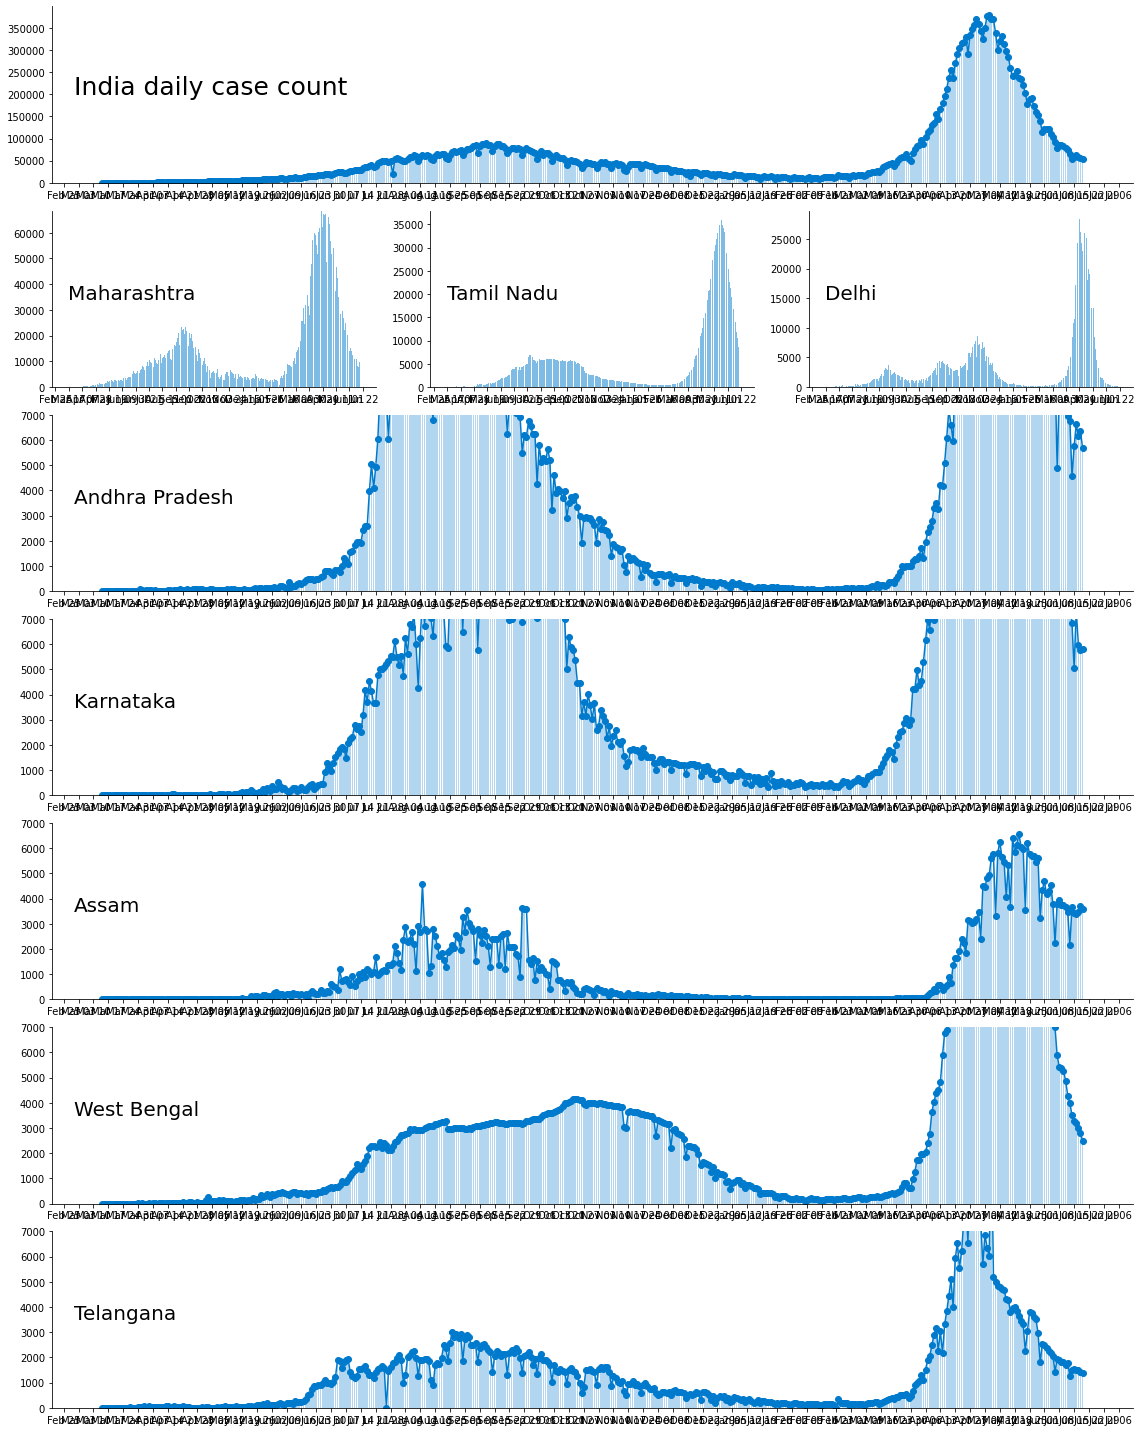

In [20]:
#hide_input
df = dft_ct_new_cases.copy()
df.loc['Total'] = df.sum()
n = 5
ax = []
fig = plt.figure(figsize = (16,20))
gs = fig.add_gridspec(n+2, 3)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#007acc')
ax1.plot(ef.date,ef.Total , marker="o", color='#007acc')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=25);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['Maharashtra'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.Maharashtra,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.Maharashtra.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.05, 0.5,'Maharashtra', transform = ax2.transAxes, fontsize=20);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)


ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['Tamil Nadu'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['Tamil Nadu'],color = '#007acc',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 0.5,'Tamil Nadu', transform = ax3.transAxes, fontsize=20);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['Delhi'].rename_axis('date').reset_index()
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.Delhi,color = '#007acc',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 0.5,'Delhi', transform = ax4.transAxes, fontsize=20)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],color = '#007acc',alpha=0.3)
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o',color='#007acc')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 20);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].set_ylim([0,7000])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()



In [21]:
#hide_input
print(df_table.to_string(index=False))

                      states    Cases  Deaths   PCases  PDeaths  Cases (+)  Deaths (+)  Fatality Rate
                 Maharashtra  5963420  117356  5954508   116674       8912         682           1.97
                   Karnataka  2801936   33763  2796121    33602       5815         161           1.20
                      Kerala  2797748   11949  2785305    11834      12443         115           0.43
                  Tamil Nadu  2414680   31015  2406497    30835       8183         180           1.28
              Andhra Pradesh  1844917   12269  1839243    12224       5674          45           0.67
               Uttar Pradesh  1704139   22132  1703882    22081        257          51           1.30
                 West Bengal  1479523   17295  1477037    17240       2486          55           1.17
                       Delhi  1432168   24907  1432033    24900        135           7           1.74
                   Rajasthan   950961    8891   950768     8884        193        